In [1]:
import networkx as nx
import syft as sy
import numpy as np
import matplotlib.pyplot as plt
import pprint
import datetime
from datetime import datetime

from syft.service.action.action_graph_service import ActionGraphService
from syft.service.action.action_graph import InMemoryActionGraphStore, InMemoryGraphConfig, InMemoryStoreClientConfig
from syft.service.context import AuthedServiceContext
from syft.node.credentials import SyftSigningKey
from syft.service.action.action_graph import Action, NodeActionData, NodeActionDataUpdate
from syft.service.action.action_graph import ActionStatus
from syft.service.action.numpy import NumpyArrayObject, ActionObject
from syft.service.action.action_graph import NetworkXBackingStore
from syft.types.datetime import DateTime


print(sy.__version__)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/dk/Desktop/projects/PySyft


0.8.0.post2


In [2]:
store_config = InMemoryGraphConfig()
verify_key = SyftSigningKey.generate().verify_key
graph_store = InMemoryActionGraphStore(store_config=store_config)

# create some actions and add them to the graph store
action_obj_a = ActionObject.from_obj([2, 4, 6])
action_obj_b = ActionObject.from_obj([2, 3, 4])
# action1 -> a + b = c
action1 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action_obj_a.syft_lineage_id,
    args=[action_obj_b.syft_lineage_id],
    kwargs={},
)
graph_store.set(credentials=verify_key, action=action1)

# action2 -> initialization of variable d
action_obj_d = ActionObject.from_obj([1, 2, 3])
action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_d.syft_lineage_id],
    kwargs={},
)
graph_store.set(credentials=verify_key, action=action2)

# action3 -> c * d
action3 = Action(
    path="action.execute",
    op="__mul__",
    remote_self=action1.result_id,
    args=[action2.result_id],
    kwargs={},
)
graph_store.set(credentials=verify_key, action=action3)

Ok(class NodeActionData:
  id: str = c21b6ae92bb24915b5ff93eb1ffbb5a8
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-28 23:47:01
  updated_at: str = None
  user_verify_key: str = 9e3ac0df597185e090ff57693a380146c136f7181063e318cdd6f4052a0e28dd
  is_mutated: str = False
)

In [3]:
# action4 -> d.astype('int32')
as_type_action_obj = ActionObject.from_obj("np.int32")
action4 = Action(
    path="action.execute",
    op="astype",
    remote_self=action2.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action2.result_id,
)
graph_store.set(credentials=verify_key, action=action4)

# check if the node action 2 has been mutated
node_action_data_2: NodeActionData = graph_store.get(
    uid=action2.id, credentials=verify_key
).ok()
# assert node_action_data_2.is_mutated == True
    
arg_action_obj = ActionObject.from_obj(48)
action5 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action4.result_id,
    args=[arg_action_obj.syft_lineage_id],
    kwargs={},
)
graph_store.set(credentials=verify_key, action=action5)

Ok(class NodeActionData:
  id: str = 3dd07cc0c70d4d89a96ff9b17df89e78
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-28 23:47:03
  updated_at: str = None
  user_verify_key: str = 9e3ac0df597185e090ff57693a380146c136f7181063e318cdd6f4052a0e28dd
  is_mutated: str = False
)

In [4]:
graph_store.nodes.ok()

NodeDataView({<UID: a673c56ac4b6401383ad7c23e5708533>: {'data': class NodeActionData:
  id: str = a673c56ac4b6401383ad7c23e5708533
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-28 23:47:01
  updated_at: str = None
  user_verify_key: str = 9e3ac0df597185e090ff57693a380146c136f7181063e318cdd6f4052a0e28dd
  is_mutated: str = False
}, <UID: f1449d8b3bab4982b30e186d392d22be>: {'data': class NodeActionData:
  id: str = f1449d8b3bab4982b30e186d392d22be
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-28 23:47:01
  updated_at: str = 2023-04-28 23:47:03
  user_verify_key: str = 9e3ac0df597185e090ff57693a380146c136f7181063e318cdd6f4052a0e28dd
  is_mutated: str = True
}, <UID: c21b6ae92bb24915b5ff93eb1ffbb5a8>: {'data': class NodeActionData:
  id: str = c21b6ae92bb24915b5ff93eb1ffbb5a8
  action: str = syft.serv

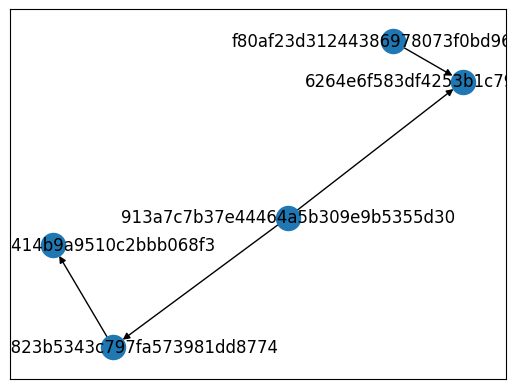

In [5]:
graph_store.graph.visualize()

In [6]:
len(graph_store.nodes.ok())

5

In [13]:
nodes = list(graph_store.nodes.ok())
node_action_data_1: NodeActionData = nodes[0][1]["data"]
node_action_data_2: NodeActionData = nodes[1][1]["data"]
node_action_data_3: NodeActionData = nodes[2][1]["data"]
node_action_data_4: NodeActionData = nodes[3][1]["data"]
node_action_data_5: NodeActionData = nodes[4][1]["data"]
node_action_data_2

```python
class NodeActionData:
  id: str = 913a7c7b37e44464a5b309e9b5355d30
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-28 23:36:22
  updated_at: str = 2023-04-28 23:36:24
  user_verify_key: str = f72763bd2167f95a6c1b786ae0ab06c7cc8227788d1e0f749c4eabd13773306b
  is_mutated: str = True

```

In [12]:
assert (
    graph_store.is_parent(
        parent=node_action_data_4.id, child=node_action_data_5.id
    ).ok()
    is True
)

In [7]:
bytes = sy.serialize(graph_store, to_bytes=True)
graph_back = sy.deserialize(bytes, from_bytes=True)

In [8]:
graph_back.edges.ok() == graph_store.edges.ok()
graph_back.nodes.ok() == graph_store.nodes.ok()

True

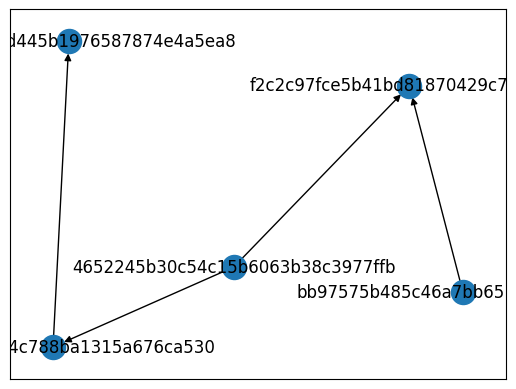

In [9]:
graph_back.graph.visualize()

### So the `ValidationError` happens after we update a node. Look into the `NodeActionDataUpdate` class and the `update` method of `InMemoryActionGraphStore` to solve this problem

`NodeActionDataUpdate` inherits from `PartialSyftObject`, which inherits from `SyftObject`. `DateTime` also inherits from 

In [9]:
data = NodeActionDataUpdate(is_mutated=True)
data

```python
class NodeActionDataUpdate:
  id: str = <class 'syft.types.syft_metaclass.Empty'>
  action: str = <class 'syft.types.syft_metaclass.Empty'>
  status: str = <class 'syft.types.syft_metaclass.Empty'>
  retry: str = <class 'syft.types.syft_metaclass.Empty'>
  created_at: str = <class 'syft.types.syft_metaclass.Empty'>
  updated_at: str = 2023-04-28 23:45:58
  credentials: str = <class 'syft.types.syft_metaclass.Empty'>
  is_mutated: str = True

```

In [12]:
for key, val in data.to_dict(exclude_empty=True).items():
    print(key, val)

updated_at 2023-04-28 23:29:22
is_mutated True


The problem lies in `updated_at` variable and the function with pydantic validator

```python
update_at: Optional[DateTime]
@pydantic.validator("updated_at", pre=True, always=True)
def make_updated_at(cls, v: Optional[DateTime]) -> DateTime:
    data = DateTime.now() if v is None else v
    return data
```

In [14]:
dex = sy.deserialize(sy.serialize(data))
dex

```python
class NodeActionDataUpdate:
  id: str = <class 'syft.types.syft_metaclass.Empty'>
  action: str = <class 'syft.types.syft_metaclass.Empty'>
  status: str = <class 'syft.types.syft_metaclass.Empty'>
  retry: str = <class 'syft.types.syft_metaclass.Empty'>
  created_at: str = <class 'syft.types.syft_metaclass.Empty'>
  updated_at: str = 2023-04-28 23:29:57
  credentials: str = <class 'syft.types.syft_metaclass.Empty'>
  is_mutated: str = True

```

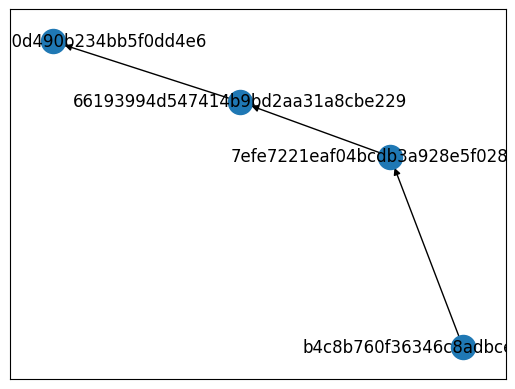

In [17]:
store_config = InMemoryGraphConfig()
verify_key = SyftSigningKey.generate().verify_key
graph_store = InMemoryActionGraphStore(store_config=store_config)

# action1 -> initialization of variable a
action_obj_a = ActionObject.from_obj([1, 2, 3])
action1 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_a.syft_lineage_id],
    kwargs={},
)
graph_store.set(credentials=verify_key, action=action1)
# action2 -> a.astype('int32') = b
as_type_action_obj = ActionObject.from_obj("np.int32")
action2 = Action(
    path="action.execute",
    op="astype",
    remote_self=action1.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action1.result_id,
)
graph_store.set(credentials=verify_key, action=action2)
# action3 -> b.astype('float64') = c
as_type_action_obj = ActionObject.from_obj("np.float64")
action3 = Action(
    path="action.execute",
    op="astype",
    remote_self=action2.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action2.result_id,
)
graph_store.set(credentials=verify_key, action=action3)
# action4 -> a.astype('complex128') = d
as_type_action_obj = ActionObject.from_obj("np.complex128")
action4 = Action(
    path="action.execute",
    op="astype",
    remote_self=action1.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action1.result_id,
)
graph_store.set(credentials=verify_key, action=action4)
graph_store.graph.visualize()

In [18]:
nodes = list(graph_store.nodes.ok())
node_action_data_1: NodeActionData = nodes[0][1]['data']
node_action_data_2: NodeActionData = nodes[1][1]['data']
node_action_data_3: NodeActionData = nodes[2][1]['data']
node_action_data_4: NodeActionData = nodes[3][1]['data']

In [19]:
print(action1.id)
print(action2.id)
print(action3.id)
print(action4.id)

b4c8b760f36346c8adbce25fa19c2246
7efe7221eaf04bcdb3a928e5f0285782
66193994d547414b9bd2aa31a8cbe229
77bf6176ffff40d490b234bb5f0dd4e6


In [20]:
graph_store.is_parent(parent=node_action_data_1.id, child=node_action_data_2.id)

Ok(True)